## identifying outliers using Tukey's method
### Tukey's Method of Identifying Outliers Just Says That Outliers are  
1. values below (Quartile 1) – (1.5 × IQR)  
and  
2. values above (Quartile 3) + (1.5 × IQR)  
where IQR = Quartile 3 - Quartile 1


In [1]:
source('../src/load_data.r'); bh2 <- BostonHousing2

In [2]:
install.packages("moments")
library(dplyr, warn.conflicts = FALSE); library(moments); library(ggplot2)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HungFeb2016\AppData\Local\Temp\Rtmp8IU3iK\downloaded_packages


In [3]:
bh2_numeric_feat <- Filter(is.numeric, bh2)

In [4]:
summary(bh2_numeric_feat)

      medv            crim                zn             indus      
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:17.02   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :50.00   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax           ptra

### Using Tukey's Method to Identify Outliers for Each Feature

In [5]:
display_bh2_outliers <- function(feature, param = 1.5) {
    feature_vec =  as.vector(bh2_numeric_feat[[feature]])
    Q1 <- quantile(feature_vec, .25)
    Q3 <- quantile(feature_vec, .75)
    tukey_window <- param*(Q3-Q1)

    # less_than_Q1 & greater_than_Q3 are masks, meaning they're vectors whose
    # elements are booleans
    less_than_Q1 <- bh2_numeric_feat[[feature]] < Q1 - tukey_window
    greater_than_Q3 <- bh2_numeric_feat[[feature]] > Q3 + tukey_window
    tukey_mask <- (less_than_Q1 | greater_than_Q3)
    return(bh2_numeric_feat[tukey_mask,])
}

In [6]:
sapply(X = colnames(bh2_numeric_feat), FUN = display_bh2_outliers, simplify = FALSE)

,medv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
3383,38.7,0.12083,0.0,2.89,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
3384,43.8,0.08187,0.0,2.89,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
3536,41.3,1.22358,0.0,19.58,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
3540,50.0,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73
3541,50.0,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92
3542,50.0,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32
3545,50.0,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70
3571,37.2,0.05780,0.0,2.46,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04
3572,39.8,0.06588,0.0,2.46,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56
3574,37.9,0.09103,0.0,2.46,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82


It is nice to be able to see the data frames filtered for outliers, but it's very granular. Let's get a count of the number of outliers for each feature. 

In [7]:
# nb that sum_outliers does not equal the number of outliers. The number of outliers may be less b/c
# of overlap
sum_outliers <- 0
for (feature in colnames(bh2_numeric_feat)) {
    outlier_count <- dim(display_bh2_outliers(feature))[1]
    print(paste(feature, outlier_count))
    
    sum_outliers <- sum_outliers + outlier_count
}
print(paste("sum_outliers = ", sum_outliers))

[1] "medv 40"
[1] "crim 66"
[1] "zn 68"
[1] "indus 0"
[1] "nox 0"
[1] "rm 30"
[1] "age 0"
[1] "dis 5"
[1] "rad 0"
[1] "tax 0"
[1] "ptratio 15"
[1] "b 77"
[1] "lstat 7"
[1] "sum_outliers =  308"


#### Note The Following Code That Do Not Work or Are Not As Good as the One Above

##### Running display_bh2_outliers() in For-Loop Will Not Display Outliers

In [8]:
for (feat in colnames(bh2_numeric_feat)) {
    display_bh2_outliers(feat)
}

##### Running lapply(X = colnames(bh2_numeric_feat), FUN = display_bh2_outliers) Will Not Display Above Each Data Frame the Name of the Feature that the Data Frame is Associated With
`lapply()` returns the data type of the parameter given it. I included `print(feat)` in the `display_bh2_outliers()` function and then passed that function to `lapply()` only to get *all* the print statements above the first data frame. That wasn't helpful.  
`sapply()` function works like `lapply()`, but it tries to simplify the output to the most elementary data structure possible. `sapply()` will not simplify the output when you pass `simplify=FALSE` as a paramter to `sapply()`.

In [9]:
DISPLAY_bh2_outliers <- function(feature, param = 1.5) {
    feature_vec =  as.vector(bh2_numeric_feat[[feature]])
    Q1 <- quantile(feature_vec, .25)
    Q3 <- quantile(feature_vec, .75)
    tukey_window <- param*(Q3-Q1)
    less_than_Q1 <- bh2_numeric_feat[[feature]] < Q1 - tukey_window
    greater_than_Q3 <- bh2_numeric_feat[[feature]] > Q3 + tukey_window
    tukey_mask <- (less_than_Q1 | greater_than_Q3)
    
    # THIS LINE NOT IN WORKING FUNCTION
    print(feature)
    
    return(bh2_numeric_feat[tukey_mask,])
}

In [10]:
lapply(X = colnames(bh2_numeric_feat), FUN = DISPLAY_bh2_outliers)

[1] "medv"
[1] "crim"
[1] "zn"
[1] "indus"
[1] "nox"
[1] "rm"
[1] "age"
[1] "dis"
[1] "rad"
[1] "tax"
[1] "ptratio"
[1] "b"
[1] "lstat"


,medv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
3383,38.7,0.12083,0.0,2.89,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
3384,43.8,0.08187,0.0,2.89,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
3536,41.3,1.22358,0.0,19.58,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
3540,50.0,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73
3541,50.0,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92
3542,50.0,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32
3545,50.0,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70
3571,37.2,0.05780,0.0,2.46,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04
3572,39.8,0.06588,0.0,2.46,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56
3574,37.9,0.09103,0.0,2.46,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82


### Identifying Each Instance That is an Outlier for more than One Feature

In [11]:
raw_outliers = c()
for (feature in colnames(bh2_numeric_feat)){
    outlier_df = display_bh2_outliers(feature)
    outlier_indices = rownames(outlier_df)
    raw_outliers = c(raw_outliers, outlier_indices)
}
raw_outliers

[1] "3383" "3384" "3536" "3540" "3541" "3542" "3545" "3571" "3572" "3574"
 [11] "3578" "3585" "3602" "3662" "3671" "3672" "3735" "3736" "3737" "3739"
 [21] "3743" "3744" "3840" "3861" "4001" "4005" "4006" "4011" "4012" "4042"
 [31] "4044" "4051" "4122" "107"  "108"  "201"  "202"  "203"  "606"  "614" 
 [41] "105"  "202"  "301"  "302"  "401"  "402"  "403"  "404"  "405"  "406" 
 [51] "407"  "501"  "503"  "504"  "506"  "507"  "508"  "512"  "602"  "606" 
 [61] "607"  "608"  "609"  "610"  "612"  "613"  "614"  "702"  "703"  "706" 
 [71] "707"  "708"  "709"  "710"  "801"  "802"  "803"  "805"  "807"  "808" 
 [81] "809"  "811"  "814"  "815"  "816"  "818"  "820"  "902"  "903"  "904" 
 [91] "905"  "906"  "907"  "908"  "910"  "912"  "913"  "914"  "916"  "917" 
[101] "923"  "1102" "1103" "1205" "1206" "1207" "2091" "2092" "2121" "2141"
[111] "2151" "2161" "3301" "3302" "3581" "3583" "3584" "3585" "3586" "3587"
[121] "3591" "3592" "3602" "3611" "3612" "3613" "3651" "3652" "3661" "3662"
[131] "3671" "3672" "3851" "3852" "3861" "4031" "4032" "4033" "4034" "4035"
[141] "4051" "4061" "4071" "4091" "4111" "4112" "4113" "4121" "4122" "4123"
[151] "4141" "4142" "4143" "4151" "4152" "4153" "4161" "4162" "4163" "4164"
[161] "4211" "4212" "4231" "5011" "5012" "5031" "5041" "5051" "5052" "5061"
[171] "5062" "5071" "5081" "5082" "3383" "3384" "3541" "3542" "3545" "3572"
[181] "3578" "3602" "3671" "3672" "3735" "3736" "3737" "3743" "3744" "3840"
[191] "4001" "4006" "4011" "4042" "4051" "101"  "102"  "105"  "302"  "503" 
[201] "506"  "702"  "709"  "801"  "5061" "5062" "5071" "5081" "5082" "3611"
[211] "3612" "3613" "4001" "4002" "4003" "4004" "4005" "4006" "4007" "4008"
[221] "4009" "4010" "4011" "4012" "2056" "2063" "2065" "2070" "2072" "3393"
[231] "3418" "3508" "3524" "3525" "3530" "3531" "3532" "3533" "3534" "3535"
[241] "3539" "3544" "3546" "3547" "3548" "3549" "4091" "104"  "105"  "503" 
[251] "607"  "613"  "703"  "705"  "706"  "707"  "708"  "709"  "710"  "801" 
[261] "802"  "803"  "805"  "807"  "808"  "809"  "810"  "811"  "812"  "813" 
[271] "814"  "815"  "816"  "817"  "818"  "819"  "820"  "821"  "901"  "902" 
[281] "903"  "904"  "905"  "906"  "913"  "914"  "915"  "918"  "919"  "923" 
[291] "924"  "1001" "1002" "1003" "1005" "1010" "1011" "1101" "1203" "1602"
[301] "1604" "3515" "301"  "302"  "507"  "709"  "801"  "906"

Just to be safe, let's check that the number of raw outliers is equal to sum_outliers

In [12]:
print(sum_outliers)
print(length(raw_outliers))

[1] 308
[1] 308


We can see for each outlier, for how many features is it an outlier.

In [13]:
table(raw_outliers)

raw_outliers
1001 1002 1003 1005  101 1010 1011  102  104  105  107  108 1101 1102 1103 1203 
   1    1    1    1    1    1    1    1    1    3    1    1    1    1    1    1 
1205 1206 1207 1602 1604  201  202  203 2056 2063 2065 2070 2072 2091 2092 2121 
   1    1    1    1    1    1    2    1    1    1    1    1    1    1    1    1 
2141 2151 2161  301  302 3301 3302 3383 3384 3393 3418 3508 3515 3524 3525 3530 
   1    1    1    2    3    1    1    2    2    1    1    1    1    1    1    1 
3531 3532 3533 3534 3535 3536 3539 3540 3541 3542 3544 3545 3546 3547 3548 3549 
   1    1    1    1    1    1    1    1    2    2    1    2    1    1    1    1 
3571 3572 3574 3578 3581 3583 3584 3585 3586 3587 3591 3592 3602 3611 3612 3613 
   1    2    1    2    1    1    1    2    1    1    1    1    3    2    2    2 
3651 3652 3661 3662 3671 3672 3735 3736 3737 3739 3743 3744 3840 3851 3852 3861 
   1    1    1    2    3    3    2    2    2    1    2    2    2    1    1    2 
4001 4002 4003 

Now let's look at how many outliers are outliers for more than one feature. 
62 tracts are outliers for two features, eleven for three features, and two for four features.

In [14]:
table(table(raw_outliers))


  1   2   3   4 
143  62  11   2 

Finally, let's look at each tract that is an outlier for more than one feature.

In [15]:
mask <- table(raw_outliers) > 1
ndex_outliers_more_than_1_feat <- table(raw_outliers)[mask]
ndex_outliers_more_than_1_feat <- data.frame(ndex_outliers_more_than_1_feat)$raw_outliers

multi_outliers_df <- bh2_numeric_feat[ndex_outliers_more_than_1_feat, ]

### Assessing Perentage of the Total Data That Are Outliers for Multiple Features

In [16]:
library(repr); options(repr.plot.width=10, repr.plot.height=5)
freq_outliers_many_feat_df <- table(table(raw_outliers))
freq_outliers_many_feat_df <- data.frame(freq_outliers_many_feat_df)

n_non_outliers <- dim(bh2_numeric_feat)[1] - length(unique(raw_outliers)) 
freq_outliers_many_feat_df <- rbind(freq_outliers_many_feat_df, data.frame("Var1" = "0", 
                                                                          "Freq" = n_non_outliers)
                                    )
freq_outliers_many_feat_df["propn_of_data"] <- freq_outliers_many_feat_df["Freq"]/506
freq_outliers_many_feat_df


Var1,Freq,propn_of_data
1,143,0.282608696
2,62,0.122529644
3,11,0.021739130
4,2,0.003952569
0,288,0.569169960


## Visualizing Outliers

In [18]:
bh2['outlier_for'] <- rownames(bh2) %in% raw_outliers

In [19]:
freq_outliers <- as.data.frame(table(raw_outliers))

outliers_many_feats <- freq_outliers[freq_outliers$Freq > 1,]$raw_outliers

many_feats <- rownames(bh2) %in% outliers_many_feats
bh2$outlier_for[many_feats] <- 'many_feats'

bh2$outlier_for[bh2$outlier_for == TRUE] <- 'one_feat'
bh2$outlier_for[bh2$outlier_for == FALSE] <- 'zero'

In [20]:
head(bh2)

,medv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,outlier_for
2011,24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,zero
2021,21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,zero
2022,34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,zero
2031,33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,zero
2032,36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,zero
2033,28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,zero


In [31]:
colnames(t)

[1] "medv"            "crim"            "zn"              "indus"          
 [5] "nox"             "rm"              "age"             "dis"            
 [9] "rad"             "tax"             "ptratio"         "b"              
[13] "lstat"           "bh2$outlier_for"

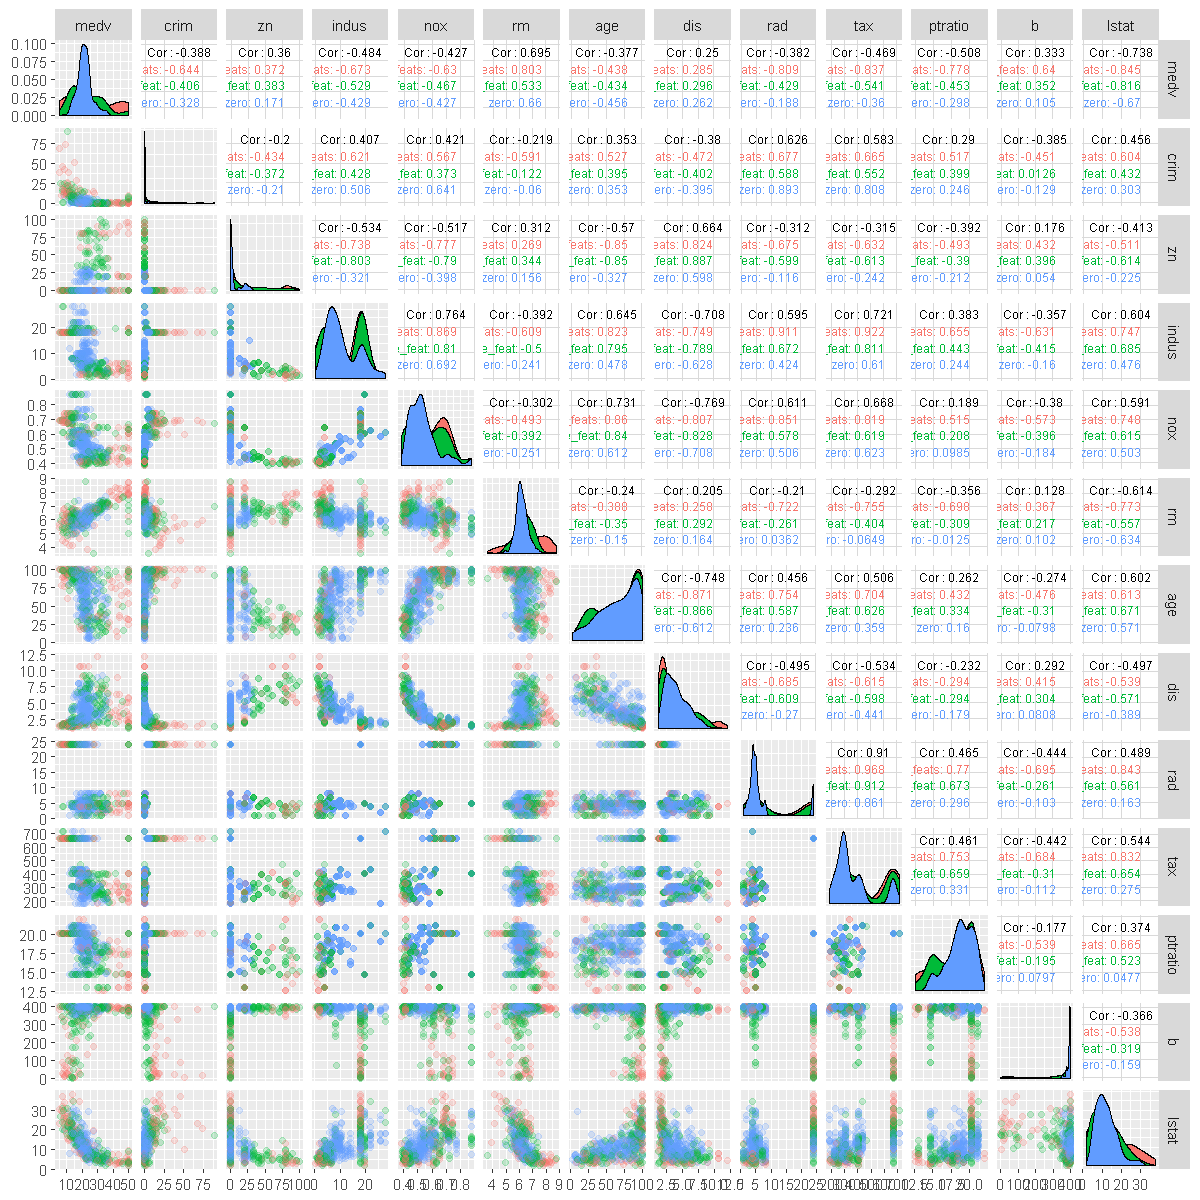

In [34]:
library(GGally)
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(data = bh2,
        columns = colnames(Filter(is.numeric, bh2)),
        mapping = aes(color = outlier_for),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, alpha = 0.2)),
       )

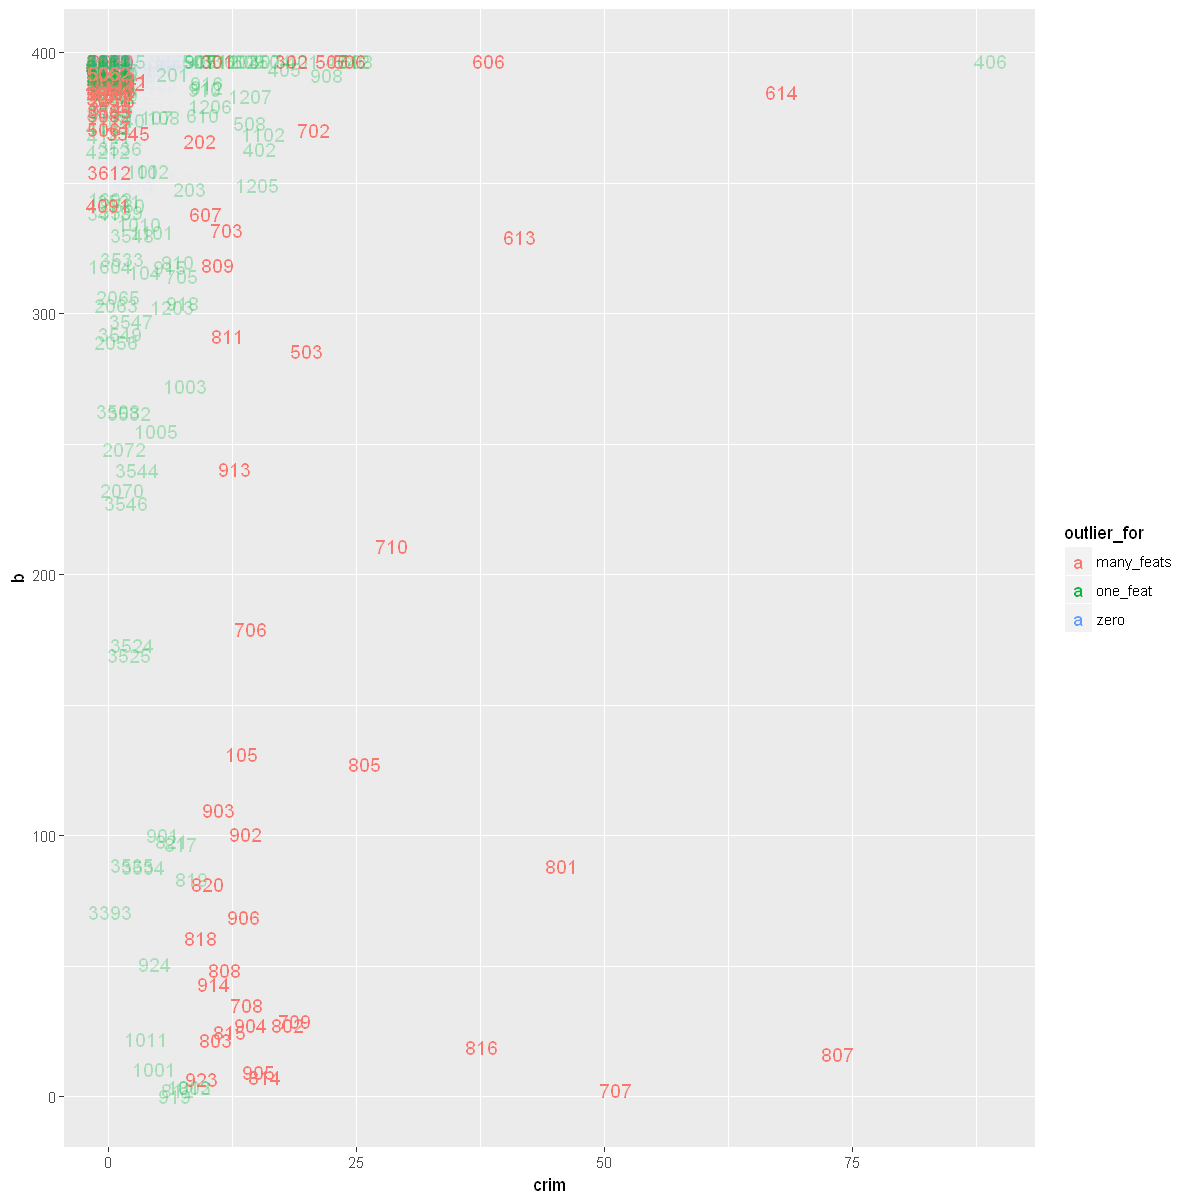

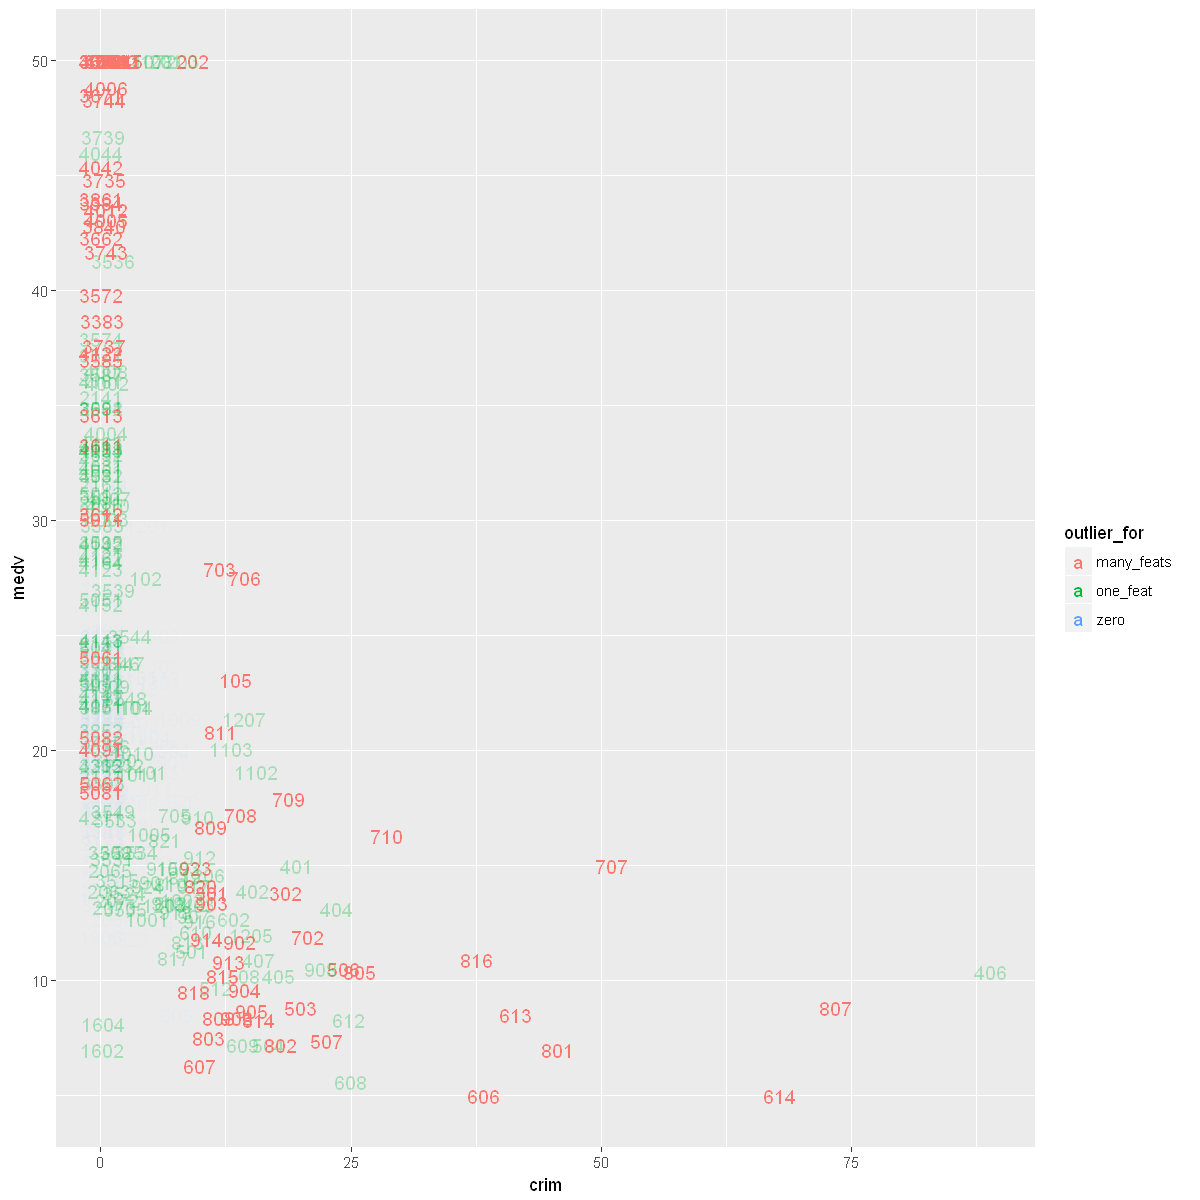

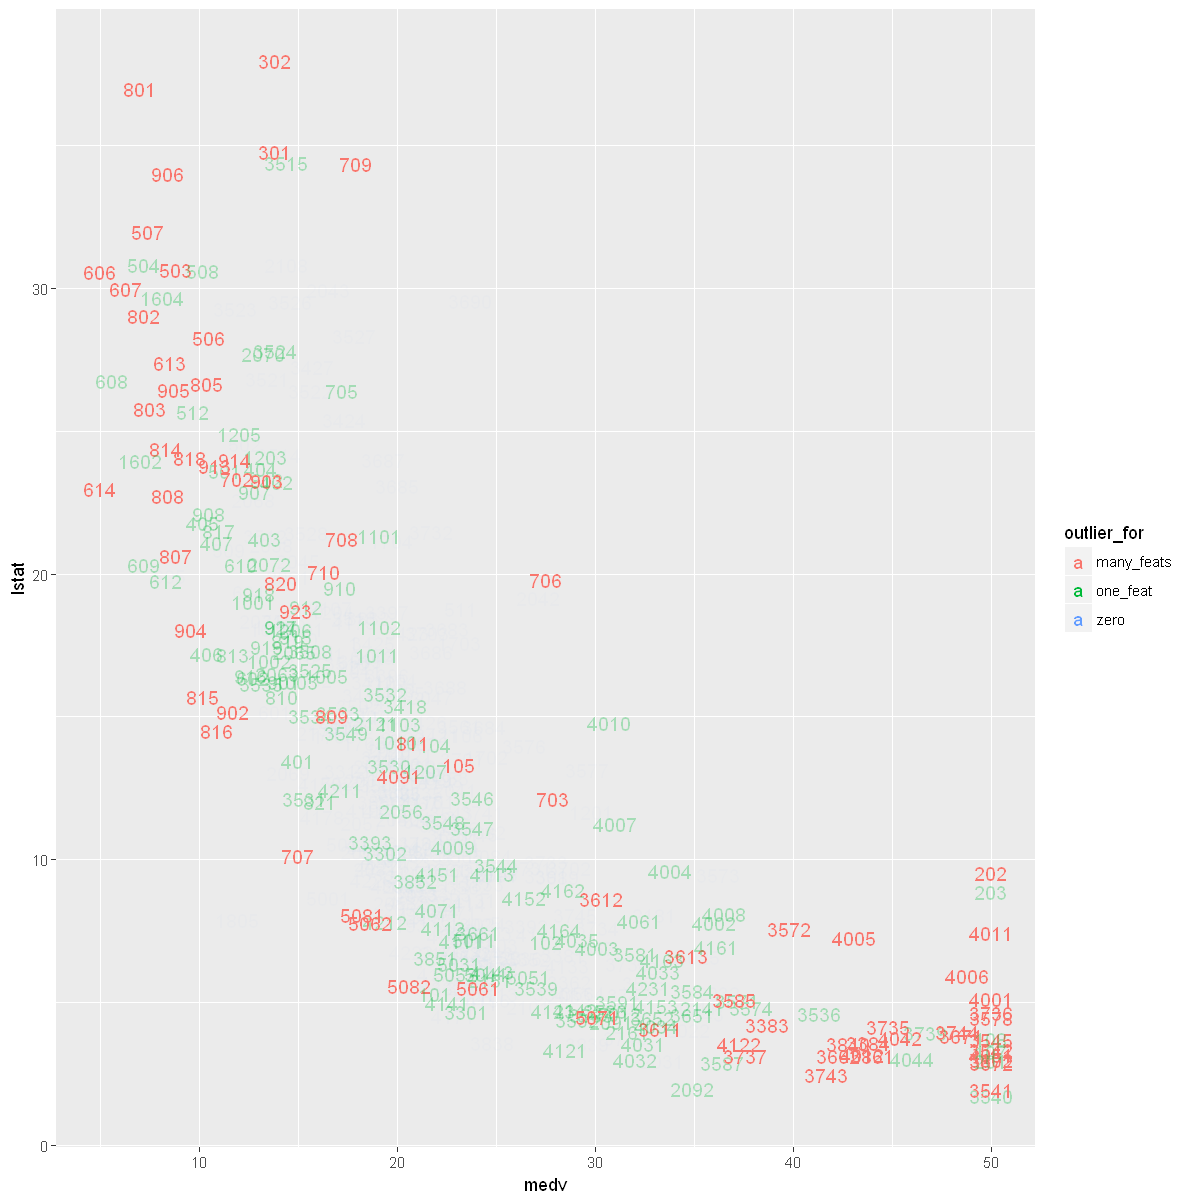

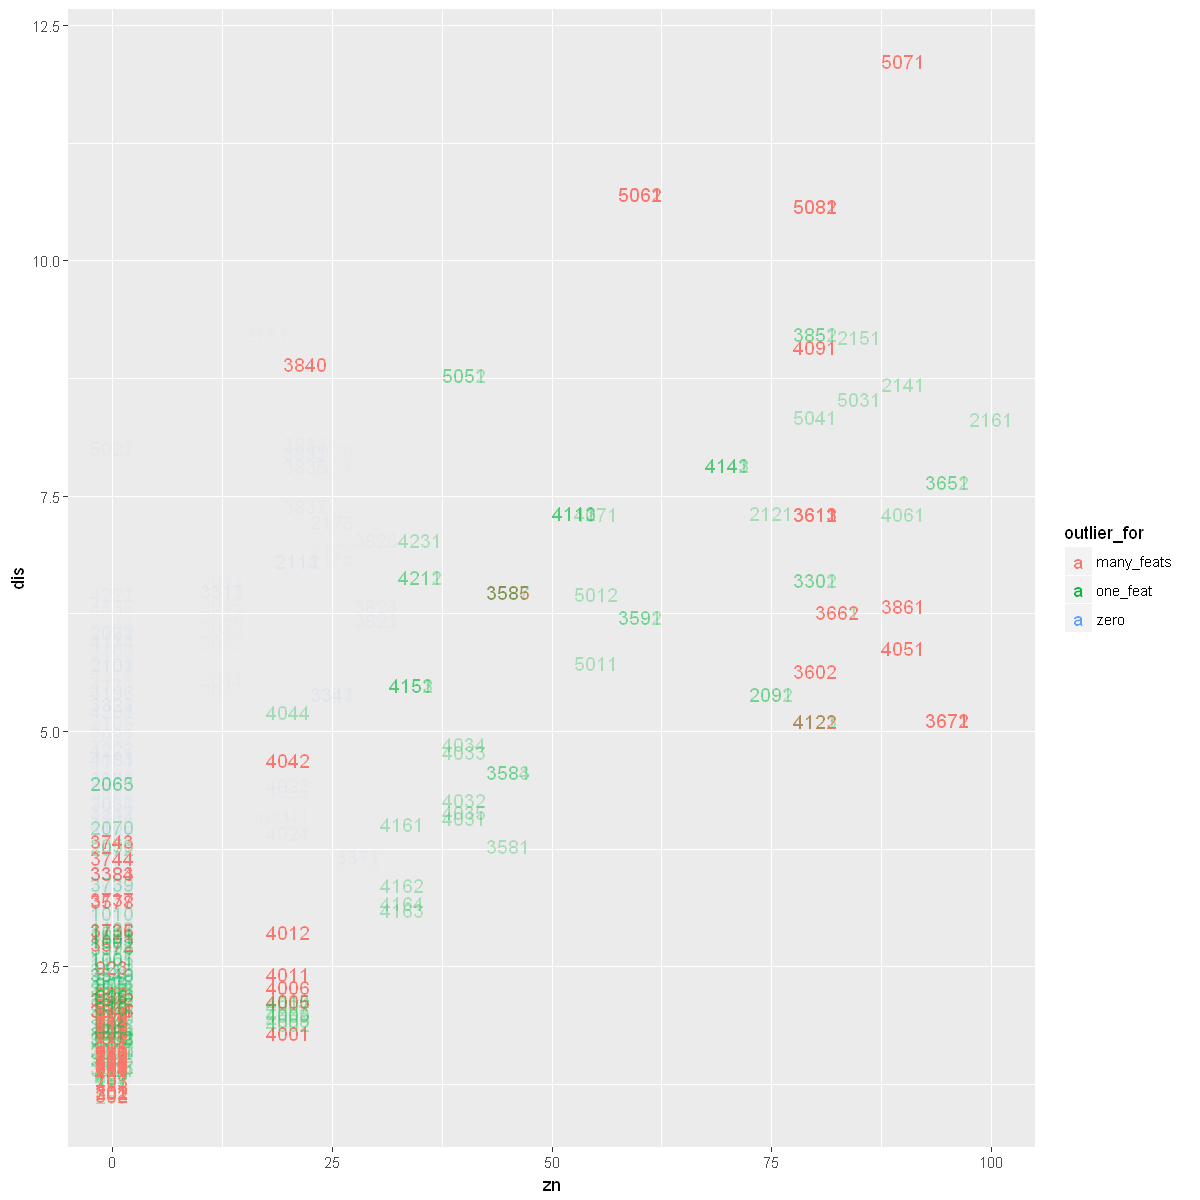

In [36]:
show_outliers_in_scatter <- function(xFeat, yFeat) {
    ggplot(bh2, aes_string(x = substitute(xFeat), y = substitute(yFeat), color = 'outlier_for',
                                alpha = 'outlier_for')) +
    geom_text(check_overlap = FALSE, size = 4, aes(label = rownames(bh2))) +
    scale_alpha_manual(guide = 'none', values = list(zero = 0.02, one_feat = 0.3, many_feats = 1))
}

show_outliers_in_scatter(crim, b)
show_outliers_in_scatter(crim, medv)
show_outliers_in_scatter(medv, lstat)
show_outliers_in_scatter(zn, dis)